In [1]:
import qiskit as q
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
%matplotlib inline

There are numerous properties of the quantum world that make it ideal for random number generation.

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

To use an actual quantum computer, we must connect to a backend.

In [13]:
provider = IBMQ.get_provider("ibm-q")

# Connect to backend with shortest queue
min_queue_time = 1000000
min_queue_name = ""
min_queue_qubits = 0
simulated_name = ""
for backend in provider.backends():
    jobsQueued = backend.status().pending_jobs
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        simulated_name = backend.name()
    if (jobsQueued <= min_queue_time) & (qubit_count != "simulated"):
        min_queue_time = jobsQueued
        min_queue_name = backend.name()
        min_queue_qubits = qubit_count
    print(f"{backend.name()} has {jobsQueued} jobs queued and {qubit_count} qubits")
    
backend = provider.get_backend(min_queue_name)
backend_sim = provider.get_backend(simulated_name)
print(f"\nconnected to backend: {min_queue_name}")

ibmq_qasm_simulator has 0 jobs queued and simulated qubits
ibmqx2 has 1 jobs queued and 5 qubits
ibmq_16_melbourne has 0 jobs queued and 14 qubits
ibmq_vigo has 0 jobs queued and 5 qubits
ibmq_ourense has 1 jobs queued and 5 qubits
ibmq_london has 17 jobs queued and 5 qubits
ibmq_burlington has 0 jobs queued and 5 qubits
ibmq_essex has 2 jobs queued and 5 qubits

connected to backend: ibmq_burlington


We can model $2^n$ sided dice using a quantum circuit with the hadamard logic gate. A qubit ran through a hadamard gate is put in superposition, and when measured, is mapped to 0 or 1 at theoretically equal probabilities. A circuit with $n$ qubits has $2^n$ potential outcomes.

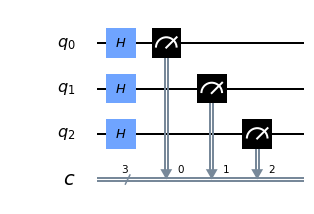

In [15]:
def quantum_dice(n): 
    
    circuit = q.QuantumCircuit(n, n)

    # Apply hadamard gate to qubits
    for i in range(n):
        circuit.h(i)
    
    # Measure all n qubits
    measure_list = [i for i in range(n)]
    circuit.measure(measure_list, measure_list)
    
    return circuit

# Visualization of quantum dice with 3 qubits
quantum_dice(3).draw(output="mpl")

While the probabilities of each side being rolled with quantum dice should be equivalent, due to quantum noise and error, they are not in actuality. This can be observed when using a simulated vs real quantum system.

Job Status: job has successfully run


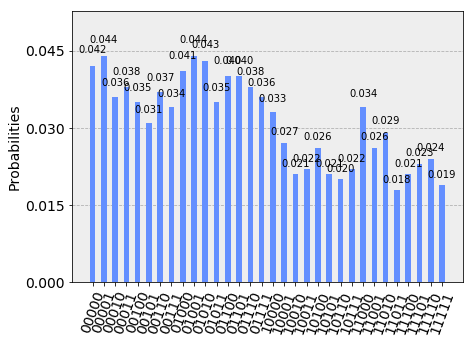

In [17]:
circuit = quantum_dice(5)

job = q.execute(circuit, backend=backend, shots=1000)
job_monitor(job)
result = job.result()

counts = result.get_counts(circuit)
plot_histogram([counts])

Job Status: job has successfully run


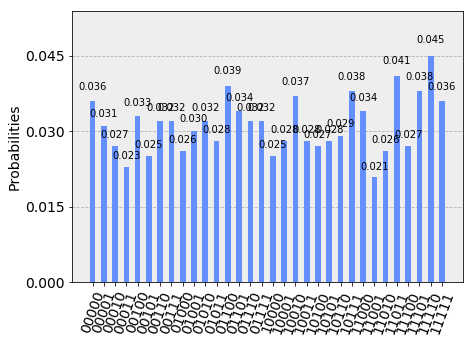

In [18]:
job_sim = q.execute(circuit, backend=backend_sim, shots=1000)
job_monitor(job)
result_sim = job_sim.result()

counts_sim = result_sim.get_counts(circuit)
plot_histogram([counts_sim])